Mysterious Dataset [35 marks]
In the industry, we often have to deal with unstructured data. Sometimes we have the privilege of
structure but the features may or may not be intuitive! In such a scenario, we need to study the
distribution of the data and make predictions.
Enough words, now its time to jump to action. Given the dataset here, perform distribution analysis
and classify the data into appropriate labels.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("train_data_question_3.csv",chunksize=3000)

In [4]:
df = pd.DataFrame()
for chunk in dataset:
    # display(chunk.shape)
    df = pd.concat([df, chunk], ignore_index=True)
    break

In [5]:
# df = output.copy()

In [6]:
df.describe()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_4599,Feature_4600,Feature_4601,Feature_4602,Feature_4603,Feature_4604,Feature_4605,Feature_4606,Feature_4607,label
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.003992,-0.004096,-0.002242,-0.000152,0.003955,0.003415,-0.000915,0.001114,0.000964,0.016970,...,0.122230,0.404690,0.006113,0.028919,0.233519,0.176771,0.132107,0.032906,0.301796,4.471000
std,0.201646,0.200422,0.198786,0.198620,0.206075,0.199487,0.197008,0.194604,0.198642,0.215921,...,0.723736,1.295818,0.278544,0.569706,0.992645,0.760333,0.846990,0.332083,1.190419,2.831107
min,-0.764066,-0.656690,-0.733022,-0.683201,-0.724797,-0.633768,-0.785656,-0.702688,-0.702424,-0.744480,...,-0.758324,-0.683923,-0.672887,-0.870249,-0.716577,-0.700995,-0.707583,-0.752090,-0.655267,0.000000
25%,-0.139805,-0.135932,-0.139311,-0.130738,-0.137126,-0.127607,-0.130614,-0.128532,-0.134248,-0.123798,...,-0.128293,-0.096496,-0.143347,-0.129075,-0.115276,-0.108745,-0.120892,-0.128491,-0.116787,2.000000
50%,-0.004953,-0.004897,-0.002465,-0.003579,0.001676,0.007112,-0.003953,0.005749,-0.002885,0.009701,...,0.014893,0.055072,-0.001135,0.007237,0.021736,0.040682,0.016322,0.011500,0.025380,4.000000
75%,0.132829,0.126735,0.129688,0.132331,0.145150,0.138641,0.126911,0.132339,0.130194,0.153536,...,0.161499,0.266937,0.138756,0.139160,0.184511,0.217279,0.165184,0.153279,0.189957,7.000000
max,0.680518,0.808114,0.738372,0.692367,0.785003,0.693428,0.752106,0.653337,0.594993,1.439096,...,15.648912,17.475410,6.791094,19.269445,13.964040,18.724661,14.490355,5.146389,13.634337,9.000000


## Let's try to study some features

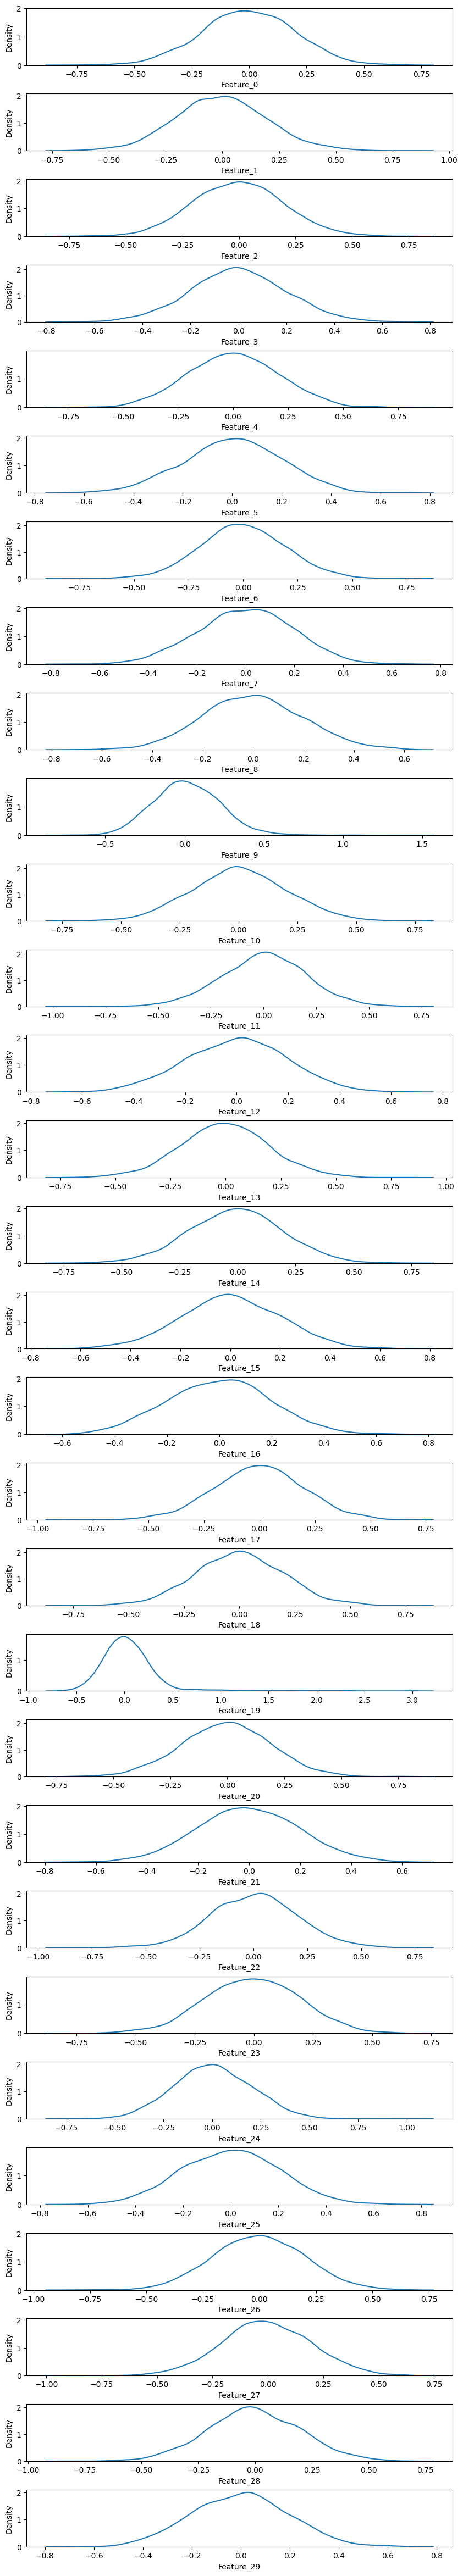

In [32]:
n = 30
fig, axes = plt.subplots(n, 1, figsize=(10, 2*n))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(df.columns):
    sns.kdeplot(data=df, x=col, ax=axes[i%n])
    if i == (n-1): 
        break

# plt.tight_layout()
plt.show()

## Seems like some feature vector for some classes( just a guess that it's feature vectors of mnist dataset)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [23]:
x_train

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_4598,Feature_4599,Feature_4600,Feature_4601,Feature_4602,Feature_4603,Feature_4604,Feature_4605,Feature_4606,Feature_4607
268,-0.118514,-0.480563,-0.161096,-0.274439,-0.088914,-0.024662,0.275022,0.200305,0.077720,0.077096,...,0.341421,0.039278,0.077992,0.038977,-0.078146,0.136279,0.012185,-0.029573,-0.481461,-0.014050
32,0.053776,0.256080,0.174332,-0.229455,-0.173692,0.130690,-0.305264,0.241871,-0.155709,-0.196995,...,0.167094,0.143888,0.121477,-0.031804,-0.232805,-0.159146,-0.042139,-0.088884,-0.467369,-0.116472
199,-0.161389,0.039393,0.009401,0.147108,0.094167,-0.049298,0.145318,-0.077969,-0.093087,-0.064029,...,-0.109347,-0.026992,6.712789,0.328785,0.076142,-0.060466,0.054331,-0.026184,-0.025587,-0.000109
1488,0.128258,0.396538,-0.026352,-0.044125,0.105574,0.148881,0.213966,-0.025237,0.063628,0.204550,...,-0.033957,0.024692,0.304486,0.171420,-0.098327,-0.059775,3.565096,-0.016206,0.044818,-0.172104
228,-0.764066,0.152929,-0.424927,0.005745,-0.131787,-0.164188,0.170609,0.044121,-0.106917,0.225760,...,-0.083192,0.103821,0.203583,-0.031465,0.188987,0.032328,2.033132,0.049246,0.332791,0.144430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,-0.006874,0.020106,-0.269675,-0.247441,-0.011923,0.243013,0.281167,0.092288,-0.379683,0.293592,...,0.327771,-0.163269,-0.270002,0.003999,0.251499,-0.137237,0.916997,0.118820,-0.111420,-0.212275
905,0.306616,-0.224729,0.504080,0.336628,0.044405,-0.079327,0.145991,-0.214356,0.108077,-0.267972,...,-0.318015,0.076268,0.062002,-0.020919,-0.001879,-0.238101,-0.176999,0.111756,0.031647,-0.127962
1096,0.233120,-0.321526,0.357103,0.178235,-0.174616,0.358458,-0.078078,0.074237,0.074969,0.126605,...,0.212005,0.924682,0.024100,-0.219841,-0.047078,-0.330164,-0.540103,0.109166,0.309842,6.588893
235,-0.130601,-0.062444,-0.106066,0.494597,0.303752,0.304111,0.085125,-0.031714,0.336164,-0.371599,...,0.077009,0.267670,0.494761,-0.128889,-0.196671,-0.071034,0.252040,0.253853,0.249174,3.954968


## Observation: The accuracy comes out to be 0.50 ,on average so let's try to do dimensionality-reduction 

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import umap

#### LDA and TSNE compare to PCA should give more better output ,as the data are classified ,so better similar points should be close together and separate from different classes 

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=784)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(pca_x_train,y_train)
lr_accuracy = accuracy_score(lr.predict(pca_x_test),y_test)
print("Logistic Regression Accuracy:", lr_accuracy)


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(pca_x_train, y_train)
svm_predictions = svm_classifier.predict(pca_x_test)
svm_accuracy = accuracy_score(svm_predictions, y_test)
print("SVM Accuracy:", svm_accuracy)

e:\Data Science\Internship_Assignment\applyin.co\Myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.4816666666666667
SVM Accuracy: 0.5066666666666667


In [68]:


# Assuming x_train, y_train, x_test, and y_test are defined
lda = LinearDiscriminantAnalysis(n_components=8)
lda_x_train = lda.fit_transform(x_train, y_train)
lda_x_test = lda.transform(x_test)

lr = LogisticRegression()
lr.fit(lda_x_train, y_train)
lr_accuracy = accuracy_score(lr.predict(lda_x_test), y_test)
print("Logistic Regression Accuracy:", lr_accuracy)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(lda_x_train, y_train)
svm_predictions = svm_classifier.predict(lda_x_test)
svm_accuracy = accuracy_score(svm_predictions, y_test)
print("SVM Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.3983333333333333
SVM Accuracy: 0.3933333333333333


In [65]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3)
tsne_x_train = tsne.fit_transform(x_train)
tsne_x_test = tsne.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(tsne_x_train,y_train)
accuracy_score(lr.predict(tsne_x_test),y_test)

0.085

In [58]:
# from sklearn.linear_model import SGDClassifier, Perceptron, RidgeClassifier, PassiveAggressiveClassifier
# from sklearn.naive_bayes import GaussianNB

# # Define classifiers
# svm_classifier = SVC(kernel='linear')
# sgd_classifier = SGDClassifier()
# perceptron_classifier = Perceptron()
# ridge_classifier = RidgeClassifier()
# passive_aggressive_classifier = PassiveAggressiveClassifier()
# naive_bayes_classifier = GaussianNB()

# classifiers = [('svm', svm_classifier), ('sgd', sgd_classifier), ('perceptron', perceptron_classifier), 
#                ('ridge', ridge_classifier), ('passive_aggressive', passive_aggressive_classifier), 
#                ('naive_bayes', naive_bayes_classifier)]

# # Evaluate classifiers
# for clf_name, clf in classifiers:
#     pipe = Pipeline([('preprocessing', preprocessing_pipeline), (clf_name, clf)])
#     scores = cross_val_score(pipe, x_train, y_train, cv=5)
#     print(f"Accuracy for {clf_name}: {scores.mean()} +/- {scores.std()}")
